In [121]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [123]:
def FUNC(T, Tc, alpha, A):
    return A*(np.abs(T-Tc))**(-alpha)



In [124]:
T_data=[0.1, 0.4, 0.7, 1, 1.3, 1.6, 1.9, 2.2, 2.5, 2.8, 3.1, 3.4, 3.7, 4, 4.3, 4.6, 4.9]
C_data=[    0        ,     0        ,    78.45848163,  1029.205504  ,
        4373.8499787 , 11443.2466    , 24344.69471025, 63080.21632727,
       43318.08745216, 16772.77118163,  2726.88719917,  2110.10905329,
        1791.99418437,  1226.013436  ,  5035.304996  ,   970.31570813,
         378.66991154]

initial_guess=[2.3, 0.5, 63081]


In [125]:
popt, pcov=curve_fit(FUNC, T_data, C_data, p0=initial_guess)
Tc_fit, alpha_fit, constant_fit=popt

C_fit=FUNC(T_data, Tc_fit, alpha_fit, constant_fit)




In [126]:

print("Estimated Critical Temperature (Tc):", Tc_fit)
print("Estimated Critical Exponent (alpha):", alpha_fit)

Estimated Critical Temperature (Tc): 2.325839165522601
Estimated Critical Exponent (alpha): 1.1574506564307157


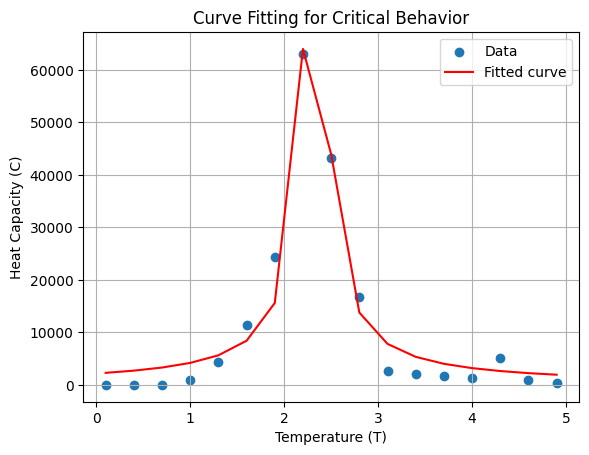

In [127]:
plt.scatter(T_data, C_data, label='Data')
plt.plot(T_data, C_fit, color='red', label='Fitted curve')
plt.xlabel('Temperature (T)')
plt.ylabel('Heat Capacity (C)')
plt.title('Curve Fitting for Critical Behavior')
plt.legend()
plt.grid(True)
plt.show()